# Project 5 Part 1 - Data Cleaning & EDA

### Overview

You are going to create a model to predict loan status (good / bad) using data from Lending Club.  Download the 2015 data from [here](https://www.lendingclub.com/info/download-data.action).  

#### Data Manipulation

The data require some cleaning before you can build the model.  Think about what you are trying to predict, and how to re-engineer categories in order to do this.  What are the categories for loan status in the data?<br>
*hint*:  only use loans that have been determined (i.e. not current loans).<br>
*hint*:  re-categorize the loans into "good" and "bad" (only two categories)

Let's use annual income, debt-to-income, interest rate, loan term, funded amount and home ownership to model the loan status.  If you don't know what these features are, have a look at the data dictionary on the Lending Club [page](https://www.lendingclub.com/info/download-data.action).

#### EDA
Before doing any kind of modelling, explore the data.  For example, what is the distribution of good / bad loans?  Are interest rate and DTI related?  Make some pivot tables / plots to better understand the data you have.

#### Model
Create your classification model using the above features!<br>
*hint*: your data must be numerical in order to create your model.  Are all of the data numerical?  What can you do to make them numerical?  (Look-up dummy variables)

Once you have your model, make a prediction based on the first row of data.  What is the probability of loan repayment for this person?  If your boss asked you whether the person is going to repay, what would you say?



**Deliverables**: a Jupyter  notebook including EDA (plotting) and your model.  Or you can work in pycharm, but you must submit EDA as well.  Also you should submit a blog post describing your project.


## Load & Clean Data

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
%matplotlib inline

# signoid function, set as global lambda expression for use throughout (in class and out)
sig = lambda g: 1./(1+np.exp(-g))

# Note: the first row in the download data was a link to the dictionary, so i manually removed
# it from the csv file instead of having to slice the header
lc_a = pd.read_csv('LoanData2015.csv')
lc_a.head(5)

/Users/alex/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit                         total_il_high_credit_limit                              
NaN NaN       11000     11000       11000            36 months   6.49%  337.09      A     A2        material handler lead    10+ years  MORTGAGE       85000      Not Verified        Dec-2015 Fully Paid  n          NaN NaN  credit_card        Credit card refinancing 016xx    MA         15    0           Apr-2005         0              NaN                    NaN                    12       0       9488      20.1%      31        w                   0.00      0.00          11513.41    11513.41        11000.00        513.41        0.0                0.0        0.0                     Oct-2016     8826.61         NaN          Oct-2016           0                          NaN                         1           INDIVIDUAL       NaN              NaN       NaN                       0              0            32193       0           2          0           1           17                 22705        52      0           2           3906       35       47300            1      2           2            3                    2927        13312          41.6    0                        0           128                121                  18                    17             0        45                   NaN                      0                     NaN                            0                     3              3               5           10        8         10            21            3                   12       0                0            0                  0                  100            0                0                    0         90996           32193             22800                                                       43696                              
              15000     15000       15000            36 months   8.49%  473.45      B     B1        Senior Associate         6 years    MORTGAGE       110000     Not Verified        Dec-2015 Fully Paid  n          NaN NaN  credit_card        Credit card refinancing 085xx    NJ         13.24 0           Dec-2002         0              NaN                    71                     16       1       19029     41.4%      33        w                   0.00      0.00          15657.93    15657.93        15000.00        657.93        0.0              

In [2]:
# Convert interest rates string to float
def percent(x):
    if pd.isnull(x):
        return x
    else:
        result = float(x.strip("%"))/100
        return result
    
# new column
lc_a['int_rate_p'] = [percent(x) for x in lc_a['int_rate']]

In [3]:
# tag loans as good/bad, then remove non-determined loans (next box)
# good = Fully Paid = 0
# bad = Default or Charged Off = 1

def status_filter(x):
    if x == 'Fully Paid':
        return 1 # good
    elif type(x) is str:
        return 
    else:
        return np.nan

# new column
lc_a['status'] = [status_filter(x) for x in lc_a['loan_status']]


In [4]:
lc_a.shape

(421097, 113)

In [5]:
# remove non-determined loans
lc_b = lc_a[lc_a['status'].isin([0, 1])]
lc_b.shape

(101152, 113)

In [6]:
# rename home_ownership and annual_inc columns for cleaner look
lc_b = lc_b.rename(columns={'home_ownership': 'home', 'annual_inc':'income'})
lc_b = lc_b.reset_index()
del lc_b['index']

In [7]:
# create dummy variables for home ownership and term

lc_c = pd.get_dummies(data =lc_b, columns = ['home', 'term'])


In [8]:
lc_f = lc_c.loc[:,['status','loan_amnt','income','dti','int_rate_p','home_OWN','home_MORTGAGE',\
           'home_RENT','term_ 36 months','term_ 60 months']]


In [9]:
lc_f.columns.values

array(['status', 'loan_amnt', 'income', 'dti', 'int_rate_p', 'home_OWN',
       'home_MORTGAGE', 'home_RENT', 'term_ 36 months', 'term_ 60 months'], dtype=object)

In [10]:
# check for null values/missing data
lc_f.isnull().sum()

status             0
loan_amnt          0
income             0
dti                0
int_rate_p         0
home_OWN           0
home_MORTGAGE      0
home_RENT          0
term_ 36 months    0
term_ 60 months    0
dtype: int64

## Exploratory Data Analysis (EDA)

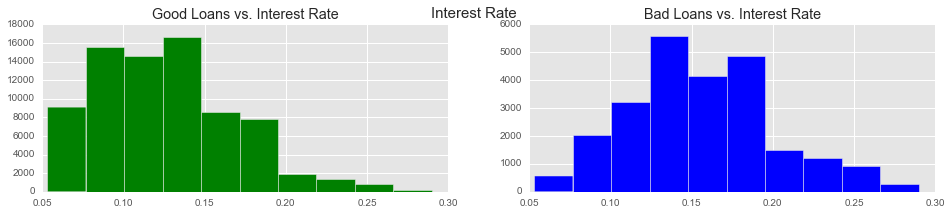

In [11]:
fig, ax2 = plt.subplots(1,2, figsize=(16,3))

category = 'Interest Rate'

lc_f[lc_f['status'] == 1]['int_rate_p'].hist(color = 'green',ax = ax2[0]) # good loans
lc_f[lc_f['status'] == 0]['int_rate_p'].hist(color = 'blue', ax = ax2[1]) # bad loans

# individual graph titles
ax2[0].set_title('Good Loans vs. {0}'.format(category))
ax2[1].set_title('Bad Loans vs. {0}'.format(category))

fig.suptitle(category, fontsize=15)

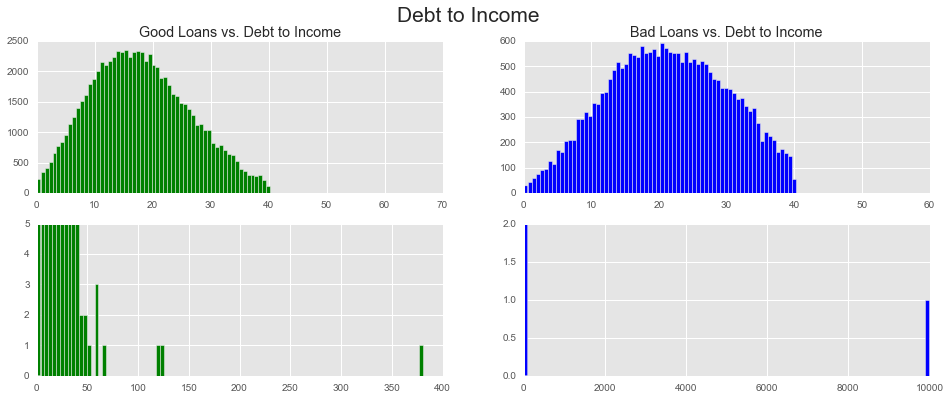

In [12]:
fig, ax2 = plt.subplots(2,2, figsize=(16,6))

category = 'Debt to Income'

lc_f[(lc_f['status'] == 1) &(lc_f['dti'] <100) ]\
    ['dti'].hist(color = 'green',bins = 100,ax = ax2[0][0]) # good loans
lc_f[lc_f['status'] == 0]['dti'].hist(color = 'blue', bins = 100, ax = ax2[1][1]) # bad loans

lc_f[lc_f['status'] == 1]['dti'].hist(color = 'green', bins = 100, ax = ax2[1][0]) # good loans
lc_f[(lc_f['status'] == 0) & (lc_f['dti'] <9900)]\
    ['dti'].hist(color = 'blue',bins = 100, ax = ax2[0][1]) # bad loans


# individual graph titles
ax2[0][0].set_title('Good Loans vs. {0}'.format(category))
ax2[0][1].set_title('Bad Loans vs. {0}'.format(category))


ax2[1][0].set_ylim(0,5)
ax2[1][1].set_ylim(0,2)

fig.suptitle(category, fontsize=21)

### Debt to Income commentary
The good loans have a few data opints above dti = 50, while the bad loans have 1.

For the bad loans, the above plots is all data with a dti < 9900, and as the bottom bad loan chart demonstrates, their is just one straggler above 50.



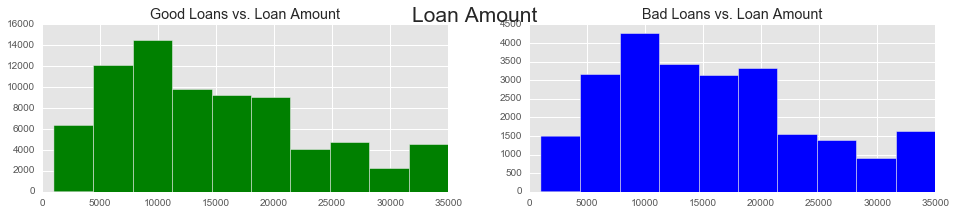

In [13]:
fig, ax2 = plt.subplots(1,2, figsize=(16,3))

category = 'Loan Amount'

lc_f[lc_f['status'] == 1]['loan_amnt'].hist(color = 'green',ax = ax2[0]) # good loans
lc_f[lc_f['status'] == 0]['loan_amnt'].hist(color = 'blue', ax = ax2[1]) # bad loans

# individual graph titles
ax2[0].set_title('Good Loans vs. {0}'.format(category))
ax2[1].set_title('Bad Loans vs. {0}'.format(category))

#ax2[0].set_ylim(0,5)
#ax2[1].set_ylim(0,2)

fig.suptitle(category, fontsize=21)

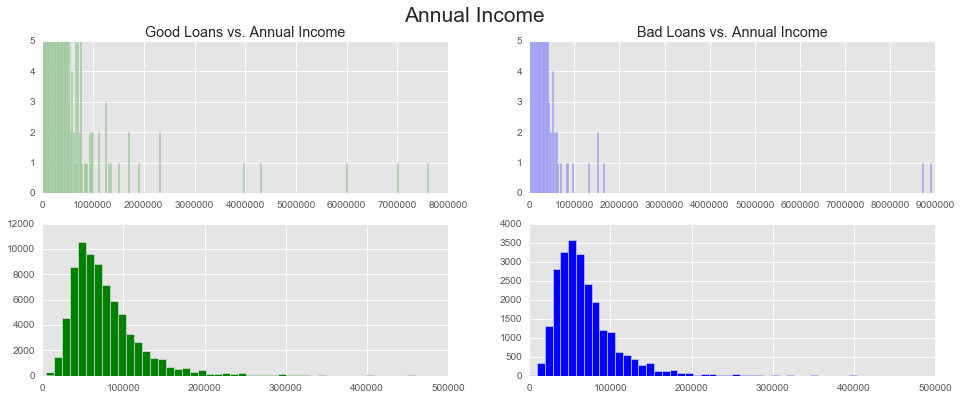

In [14]:
fig, ax2 = plt.subplots(2,2, figsize=(16,6))

category = 'Annual Income'

lc_f[lc_f['status'] == 1]['income'].hist(color = 'green', bins = 500, ax = ax2[0][0]) # good loans
lc_f[lc_f['status'] == 0]['income'].hist(color = 'blue', bins = 500, ax = ax2[0][1]) # bad loans
lc_f[(lc_f['status'] == 1)&(lc_f['income']<500000)]\
        ['income'].hist(color = 'green', bins = 50, ax = ax2[1][0]) # good loans
lc_f[(lc_f['status'] == 0)&(lc_f['income']<500000)]\
        ['income'].hist(color = 'blue', bins = 50, ax = ax2[1][1]) # bad loans

# individual graph titles
ax2[0][0].set_title('Good Loans vs. {0}'.format(category))
ax2[0][1].set_title('Bad Loans vs. {0}'.format(category))

ax2[0][0].set_ylim(0,5)
ax2[0][1].set_ylim(0,5)

fig.suptitle(category, fontsize=21)

### Annual Income commentary
The top row of charts highlights that their are a lot of singletons out at the higher income levels, with few once you get past \$2m in income


# Further Data Cleanup

Before normalizing the data, the extreme outliers will be removed. This should be a very small subset.

|Variable     | Threshold   |  # datapoints dropped  |
|-----------|-------------|-----------------|
|Interest Rate| no change | N/A              |
|Debt to Income| < 50     | 11               |
|Income       | <1,000,000 |  31            |
|Loan Amount       | no change |  N/A            |



In [15]:

lc_f = lc_f[lc_f['dti'] < 50]
lc_f = lc_f[lc_f['income'] < 1000000]

print lc_f.shape


(101110, 10)


## Normalizing Data


|Variable     | method   | Min  | Max   |
|-----------|-------------|-------|----------|
|Interest Rate| Min-Max | 5.32%      |  28.99%     |
|Debt to Income| Min-Max  |   0.0   |  48.56      |
|Income       | Min-Max |  4,000 | 980,000    |
|Loan Amount  | Min-Max |  1,000      |  35,000    |



In [16]:
# normalize parameters as listed above (this provides min/max values for above table)

# reference, 0, 0 used to help line up other 4 variables so they have same [i] as for 
# solving for omegas
norms =[('reference',0,0)] # list of min/max used for norms

def min_max(x):
    return (x-min_val)/(max_val-min_val)

min_val = lc_f['loan_amnt'].min()
max_val = lc_f['loan_amnt'].max()

lc_f['loan_amnt']=lc_f['loan_amnt'].apply(min_max)
norms.append(('loan_amnt',min_val,max_val))

In [17]:
min_val = lc_f['income'].min()
max_val = lc_f['income'].max()

lc_f['income'] = lc_f['income'].apply(min_max)
norms.append(('income',min_val,max_val))

In [18]:
min_val = lc_f['dti'].min()
max_val = lc_f['dti'].max()

lc_f['dti']=lc_f['dti'].apply(min_max)
norms.append(('dti',min_val,max_val))

In [19]:
min_val = lc_f['int_rate_p'].min()
max_val = lc_f['int_rate_p'].max()

lc_f['int_rate_p'] = lc_f['int_rate_p'].apply(min_max)
norms.append(('int_rate_p',min_val,max_val))

In [20]:
norms_df = pd.DataFrame(norms, columns = ['item', 'min','max'])

In [21]:
lc_g = lc_f.loc[:,['status','loan_amnt','income','dti','int_rate_p','home_OWN','home_MORTGAGE',\
           'term_ 36 months']]

bad = lc_g[lc_g['status'] == 0]
good = lc_g[lc_g['status'] == 1]


## Good loan vs Bad loan imbalance

To combat the imbalance (3.15 to 1 - see below), i will save the good and bad loan data in seperate dataframes. In then second part of the project i will then resample the dataset using all the bad data and then randomly choose an equal number of good loans. This new combination will become my dataset for the model sampling. 

In [22]:
bad.count()

status             24310
loan_amnt          24310
income             24310
dti                24310
int_rate_p         24310
home_OWN           24310
home_MORTGAGE      24310
term_ 36 months    24310
dtype: int64

In [23]:
good.count()

status             76800
loan_amnt          76800
income             76800
dti                76800
int_rate_p         76800
home_OWN           76800
home_MORTGAGE      76800
term_ 36 months    76800
dtype: int64

In [24]:
good.count()/bad.count()

status             3.159194
loan_amnt          3.159194
income             3.159194
dti                3.159194
int_rate_p         3.159194
home_OWN           3.159194
home_MORTGAGE      3.159194
term_ 36 months    3.159194
dtype: float64

In [25]:
lc_f.to_csv('lc_data_frame_lcf.csv')
good.to_csv('good_loans.csv')
bad.to_csv('bad_loans.csv')
norms_df.to_csv('norms.csv')

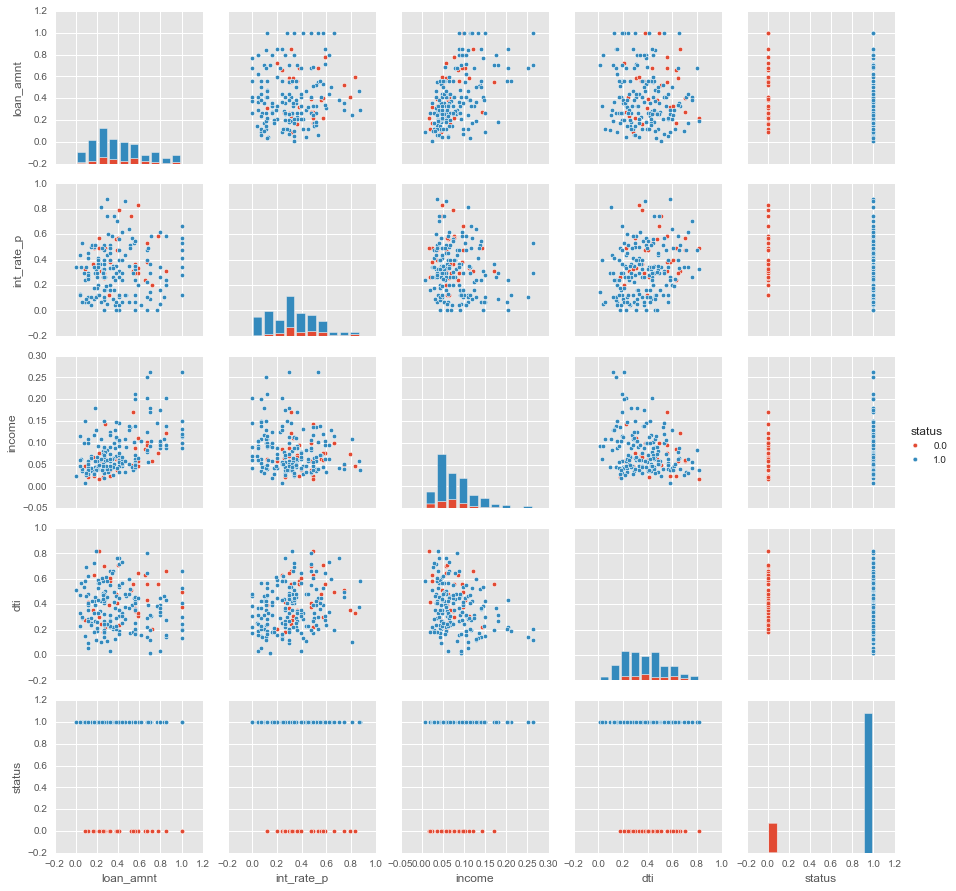

In [26]:
sns.pairplot(lc_f[['loan_amnt','int_rate_p','income','dti','status']].sample(n=200),
             hue="status")

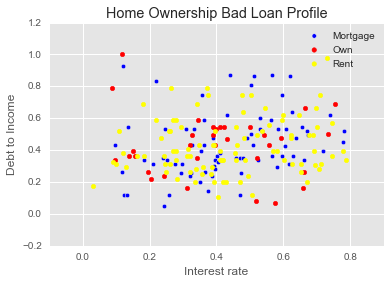

In [27]:
# Bad Loans
lc_g = lc_f[(lc_f['status'] == 0)].sample(n=200)

AX = lc_g[(lc_g['home_MORTGAGE'] == 1)]['int_rate_p']
AY = lc_g[(lc_g['home_MORTGAGE'] == 1)]['dti']
BX = lc_g[(lc_g['home_OWN'] == 1)]['int_rate_p']
BY = lc_g[(lc_g['home_OWN'] == 1)]['dti']
CX = lc_g[(lc_g['home_RENT'] == 1)]['int_rate_p']
CY = lc_g[(lc_g['home_RENT'] == 1)]['dti']

fig, ax = plt.subplots(1,1)
ax.scatter(AY,AX, label='Mortgage')
ax.scatter(BY,BX, color ='red', label ='Own')
ax.scatter(CY,CX, color ='yellow', label ='Rent')
ax.set_xlabel('Interest rate')
ax.set_ylabel('Debt to Income')
ax.set_title('Home Ownership Bad Loan Profile')
# ax.set_ylim([0,1])
ax.legend()

In [28]:
# pd.pivot_table(lc_f[lc_f['status'] == 1], index=['term_num'], values=['dti', 'int_rate_p'])

Continued in part 2.